In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize']=(10,8)

<h1>Criar o dataset </h1>

In [73]:
def get_linear_curve(x, w, b=0, noise_scale=0): #x a entrada em celsius, w inclinação da reta, b bias
    return w*x + b + noise_scale* np.random.randn(x.shape[0])

In [75]:
x = np.arange(-10, 30.1, 0.5) #função que me da valores começa do primeiro parametro até o
#segundo parametro(nao conta o ultimo numero), atualizando de acordo com oo terceiro parametro
Y = get_linear_curve(x, 1.8, 32, noise_scale=2.5)

Text(0, 0.5, '°F')

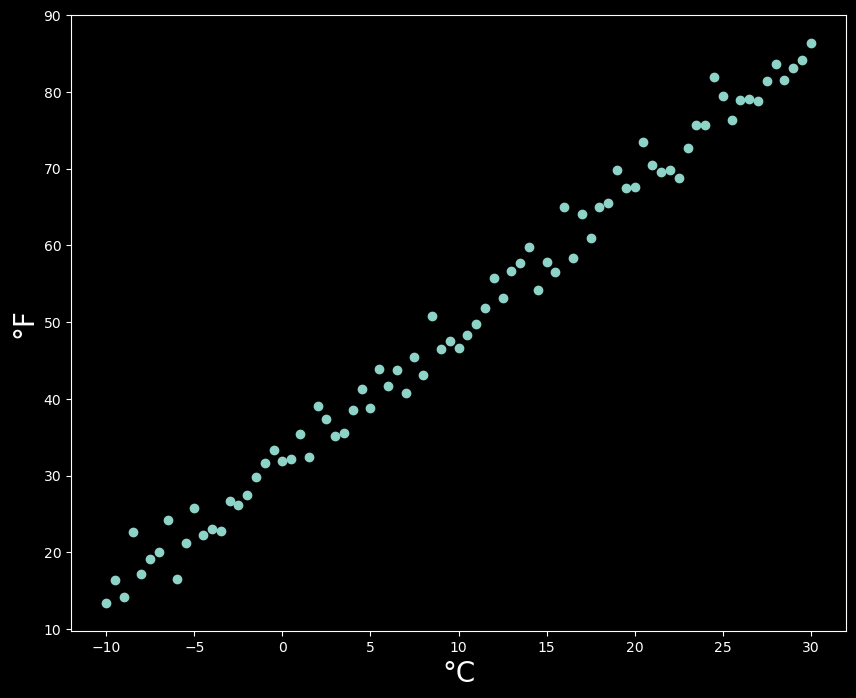

In [77]:
plt.scatter(x, Y)
plt.xlabel('°C', fontsize=20)
plt.ylabel('°F', fontsize=20)

<h1>Modelo</h1>

<ul>
    <li>Inicializar os pesos e bias</li>
    <li>Feedfoward</li>
    <li>Calcular a perda</li>
    <li>Backpropagation</li>
</ul>

In [124]:
#Inicializar
w = np.random.rand(1) #pegamos só 1 valor pois é só 1 peso
b = 0 #convenção começar o bias do 0

In [120]:
#feedfoward
def forward(inputs, w, b):
    return w*inputs + b

In [122]:
#função de perda
def mse(Y, y):
    return (Y-y)**2

In [126]:
#backpropagation
def backpropagation(inputs, outputs, targets, w, b, lr):
    #derivada do erro em relação ao peso(regra da cadeia pelo valor predito)
    dw = lr*(-2*inputs*(targets-outputs)).mean()
    #derivada do erro em relaçao ao bias
    db = lr*(-2*(targets-outputs)).mean()

    #atualização de peso
    w -= dw #learning rate já está inclusa no calculo
    b -= db
    return w, b

In [136]:
def model_fit(inputs, target, w, b, epochs = 200, lr = 0.001):
    
    for epoch in range(epochs):
        outputs = forward(inputs, w, b)
        loss = np.mean(mse(target, outputs))
        w, b = backpropagation(inputs, outputs, target, w, b, lr)

        if (epoch+1) % (epochs/10) == 0:
            print(f'Epoch: [{(epoch+1)}/{epoch}] Loss:[{loss:.4f}]')

    return w,b

In [162]:
x = np.arange(-10,10,2)
Y = get_linear_curve(x, w = 1.8, b = 32)

In [174]:
#Incialização
w = np.random.randn(1)
b = np.zeros(1) 

In [176]:
w,b = model_fit(x, Y, w, b, epochs=200, lr=0.01)
print(f'w: {w[0]:.3f}, b: {b[0]:.3f}')

Epoch: [20/19] Loss:[473.7571]
Epoch: [40/39] Loss:[216.4357]
Epoch: [60/59] Loss:[98.8785]
Epoch: [80/79] Loss:[45.1726]
Epoch: [100/99] Loss:[20.6371]
Epoch: [120/119] Loss:[9.4280]
Epoch: [140/139] Loss:[4.3072]
Epoch: [160/159] Loss:[1.9677]
Epoch: [180/179] Loss:[0.8990]
Epoch: [200/199] Loss:[0.4107]
w: 1.781, b: 31.362


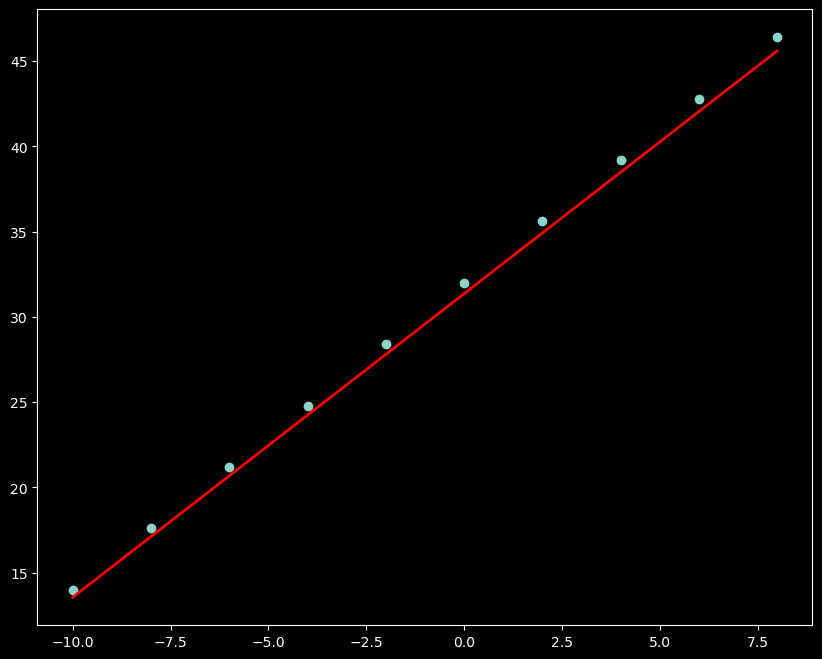

In [178]:
plt.scatter(x, Y)
plt.plot(x, get_linear_curve(x, w, b), 'r', lw=2)